# Imports

In [ ]:
#Μιχάλης Βολάκης 1115201800022
#Νικόλας Ηλιόπουλος 1115201800332
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from os.path import exists

import gensim

import string
import re

import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_corpus = stopwords.words('english')
from nltk.stem import WordNetLemmatizer

from collections import defaultdict
from operator import itemgetter

import matplotlib.pyplot as plt

import torch

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reading & Splitting data

In [ ]:
data = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/dataSets/eclass_all_with_sentiment_v2.pkl")
X_train, X_test, y_train, y_test = train_test_split(data.drop("sentiment", axis=1), data["sentiment"], test_size=0.2)

#Part 1

## Functions declaration

In [ ]:
def remove_punctuation(text):
    return ''.join([i for i in text if i not in string.punctuation])

def make_lowercase(text):
    return text.lower()

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_hashtag(text):
    return re.sub('#[A-Za-z0-9_]+', '', text)

def remove_url(text):
    return re.sub('http[s]?://\S+', '', text)

def remove_extra_spaces(text):
    return ' '.join(text.split())

def tokenization(text):
    return re.split(' ',text)

def remove_stopwords(text):
    return [i for i in text if i not in stopwords_corpus]

def merge_text(text):
    return ' '.join(text)

def pre_process(dataset):
    dataset['proc_tweet'] = dataset['text']
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_punctuation(x))
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: make_lowercase(x))
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_emojis(x))
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_hashtag(x))
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_url(x))
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_extra_spaces(x))
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: tokenization(x))
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_stopwords(x))
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: merge_text(x))
    dataset['text'] = dataset['proc_tweet']

## Pre-Processing

In [ ]:
## Preprocess train and test datasets

pre_process(data)
pre_process(X_train)
pre_process(X_test)

# Part 2

## Functions declaration

In [ ]:
def distribution_of_emotions(data):
  return {
      "positive": len(data.loc[data == "POS"]) / len(data) * 100,
      "negative": len(data.loc[data == "NEG"]) / len(data) * 100,
      "neutral" : len(data.loc[data == "NEU"]) / len(data) * 100
      }

def most_used_words(data, N):
  most_used_words = defaultdict(int)
  for sub in data['text'].tolist():
      for wrd in sub.split():
          most_used_words[wrd] += 1
  res = dict(sorted(most_used_words.items(), key = itemgetter(1), reverse = True)[:N])
  return res

## Question i

In [ ]:
whole_distribution = distribution_of_emotions(data['sentiment'])
print("Whole Distribution: ",whole_distribution)

train_distribution = distribution_of_emotions(y_train)
print("Train Distribution: ",train_distribution)

test_distribution = distribution_of_emotions(y_test)
print("Test Distribution:  ",test_distribution)

Whole Distribution:  {'positive': 11.487377687800988, 'negative': 13.477237770971092, 'neutral': 75.03538454122793}
Train Distribution:  {'positive': 11.513707446662833, 'negative': 13.396324596718978, 'neutral': 75.08996795661818}
Test Distribution:   {'positive': 11.382060382980589, 'negative': 13.800885149642871, 'neutral': 74.81705446737654}


## Question ii

In [ ]:
whole_most_used_words = most_used_words(data, 10)
print("Whole Dataset most used words: ",whole_most_used_words)

train_most_used_words = most_used_words(X_train, 10)
print("Train most used words: ",train_most_used_words)

test_most_used_words = most_used_words(X_test, 10)
print("Test most used words: ",test_most_used_words)

Whole Dataset most used words:  {'covaxin': 74222, 'vaccine': 53548, 'moderna': 47811, 'slots': 35480, 'dose': 31734, 'covid19': 30428, 'age': 25406, '18': 21785, 'pfizer': 14553, 'vaccines': 14211}
Train most used words:  {'covaxin': 59377, 'vaccine': 43011, 'moderna': 38317, 'slots': 28353, 'dose': 25434, 'covid19': 24328, 'age': 20274, '18': 17375, 'pfizer': 11679, 'vaccines': 11430}
Test most used words:  {'covaxin': 14845, 'vaccine': 10537, 'moderna': 9494, 'slots': 7127, 'dose': 6300, 'covid19': 6100, 'age': 5132, '18': 4410, 'bbmp': 2917, 'pfizer': 2874}


## Question iii

In [ ]:
positive_most_used_words = most_used_words(data.loc[data['sentiment'] == "POS"], 10)
print("Whole Dataset: Positive most used words: ",positive_most_used_words)

negative_most_used_words = most_used_words(data.loc[data['sentiment'] == "NEG"], 10)
print("Whole Dataset: Negative most used words: ",negative_most_used_words)

neutral_most_used_words = most_used_words(data.loc[data['sentiment'] == "NEU"], 10)
print("Whole Dataset: Neutral most used words: ",neutral_most_used_words)

Whole Dataset: Positive most used words:  {'vaccine': 7318, 'covaxin': 7004, 'moderna': 6900, 'covid19': 3987, 'vaccinated': 2889, 'dose': 2827, 'got': 2825, 'today': 2311, 'first': 2306, 'good': 2210}
Whole Dataset: Negative most used words:  {'moderna': 9226, 'vaccine': 7470, 'covaxin': 3959, 'covid19': 3491, 'pfizer': 2772, 'got': 2304, 'shot': 2294, 'vaccines': 2257, 'people': 2235, 'get': 1860}
Whole Dataset: Neutral most used words:  {'covaxin': 63259, 'vaccine': 38760, 'slots': 35436, 'moderna': 31685, 'dose': 27069, 'age': 25139, 'covid19': 22950, '18': 21545, 'bbmp': 14204, '2021': 13235}


## Question iv

In [ ]:
astrazeneca_tweets = data[data['text'].str.contains("astrazeneca", na=False)]          
moderna_pfizer_biontech_tweets = data[data['text'].str.contains("moderna|pfizer|biontech", na=False)]

astrazeneca_distribution = distribution_of_emotions(astrazeneca_tweets['sentiment'])
print("Astrazeneca Distribution: ",astrazeneca_distribution)

moderna_pfizer_biontech_distribution = distribution_of_emotions(moderna_pfizer_biontech_tweets['sentiment'])
print("Moderna Pfizer Biontech Distribution: ",moderna_pfizer_biontech_distribution)

Astrazeneca Distribution:  {'positive': 12.818800907998398, 'negative': 20.0026705835225, 'neutral': 67.1785285084791}
Moderna Pfizer Biontech Distribution:  {'positive': 15.374920176116694, 'negative': 18.319161092999025, 'neutral': 66.30591873088429}


## Question v

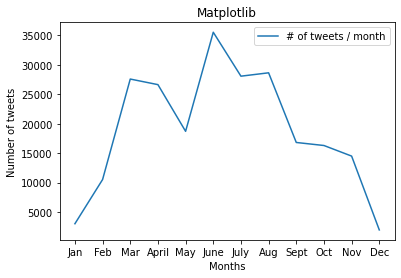

In [ ]:
# Από το trends.google.com χρησιμοποιώντας το keyword covid-19 παρατηρήσαμε αύξηση των αναζητήσεων τον Μάρτιο 2020 και αντίστοιχα μία επόμενη αύξησητον Ιούνιο,
# όπως ακριβώς φαίνεται και στο διάγραμμα από την κατανομή των μηνών.


dates = pd.to_datetime(data['date'], errors='coerce')

dates_count = dates.groupby(dates.dt.month.rename('month')).agg('count')
months = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

plt.title("Matplotlib")
plt.plot(months, dates_count.values.tolist(), label="# of tweets / month")
plt.xlabel("Months")
plt.ylabel("Number of tweets")
plt.legend(loc='best')
plt.show()

# Part 3


Σε καθέναν από τους 3 vectorizers ελέγχουμε πρώτα αν έχουμε ήδη αποθηκεύσει το pickle αρχείο με τα vectors ώστε να μην χρειαστεί να ξανακάνουμε fit εφόσον υπάρχουν ήδη.

In [ ]:
if not exists("bag_of_words.pkl"):
  vectorizer = CountVectorizer()
  bag_of_words = vectorizer.fit_transform(data.text)

  file = open('bag_of_words.pkl', 'wb')
  pickle.dump(bag_of_words, file)
else:
  file = open("bag_of_words.pkl", "rb")
  bag_of_words = pickle.load(file)

In [ ]:
if not exists("Tfidf.pkl"):
  vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english')
  Tfidf = vectorizer.fit_transform(data.text)
  file = open('Tfidf.pkl', 'wb')
  pickle.dump(Tfidf, file)
else:
  file = open("Tfidf.pkl", "rb")
  Tfidf = pickle.load(file)

In [ ]:
if not exists("Word2Vec.pkl"):
  tokenized_tweet = data.text.apply(lambda x: tokenization(x)) # tokenizing
  word_2_vec = gensim.models.Word2Vec(
  tokenized_tweet,
  size=200, # desired no. of features/independent variables
  window=5, # context window size
  min_count=2,
  sg = 1, # 1 for skip-gram model
  hs = 0,
  negative = 10, # for negative sampling
  workers= 2, # no.of cores
  seed = 34)
  file = open('Word2Vec.pkl', 'wb')
  pickle.dump(word_2_vec, file)
else:
  file = open("Word2Vec.pkl", "rb")
  word_2_vec = pickle.load(file)

# Part 4

Ορίσαμε μία συνάρτηση classify που δέχεται στα args της τον εκάστοτε vectorizer και σε κάθε κλήση της κάνουμε fit και predict με τους 3 classifiers (KNN,SVM, RFC).Χρησιμοποιήσαμε επίσης την classification_report για να υπολογίσουμε τα metrics (accuracy,precision,f1 score,recall).

In [ ]:
from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import KFold

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.model_selection import GridSearchCV



def classify(vectorizer):
  SVM = SVC(kernel = 'linear', random_state = 0)
  KNN = KNeighborsClassifier(n_neighbors=3)
  RFC = RandomForestClassifier(n_estimators=50,random_state=1)

  cross_validation = KFold(n_splits=10, random_state=None, shuffle=True)
  LIMIT_DATA = 6000

  if(isinstance(vectorizer,Word2Vec)):
    X = vectorizer.wv.vectors[:LIMIT_DATA]
  else:
    X = vectorizer[:LIMIT_DATA]

  y = data['sentiment'][:LIMIT_DATA]
  SVM_ACC, KNN_ACC, RFC_ACC = [], [], []
  SVM_PREC, KNN_PREC,  RFC_PREC = [], [], []
  SVM_F1, KNN_F1, RFC_F1 = [], [], []
  SVM_PRED,KNN_PRED,RFC_PRED = [],[],[]
  Y_TRUE = []

  for train_index, test_index in cross_validation.split(X):
    x_train, y_train = X[train_index], y[train_index]
    x_test, y_test = X[test_index], y[test_index]

    SVM.fit(x_train,y_train)
    KNN.fit(x_train,y_train)
    RFC.fit(x_train,y_train)

    PRED_SVM = SVM.predict(x_test)
    PRED_KNN = KNN.predict(x_test)
    PRED_RFC = RFC.predict(x_test)

    SVM_PRED.extend(PRED_SVM)
    KNN_PRED.extend(PRED_KNN)
    RFC_PRED.extend(PRED_RFC)

    Y_TRUE.extend(y_test)

  target_names=['NEG','NEU','POS']
  print("SVM REPORT")
  print(classification_report(Y_TRUE,SVM_PRED,target_names=target_names,zero_division=0))
  print("KNN REPORT")
  print(classification_report(Y_TRUE,KNN_PRED,target_names=target_names,zero_division=0))
  print("RFC REPORT")
  print(classification_report(Y_TRUE,RFC_PRED,target_names=target_names,zero_division=0))
  
#call classify function for each of the 3 vectorizers
print("---------- Bag Of Words Vectorizer ---------")
classify(bag_of_words)
print("---------- TFIDF Vectorizer ---------")
classify(Tfidf)
print("---------- WORD2VEC Vectorizer ---------")
classify(word_2_vec)

---------- Bag Of Words Vectorizer ---------
SVM REPORT
              precision    recall  f1-score   support

         NEG       0.63      0.49      0.55       999
         NEU       0.80      0.88      0.84      3786
         POS       0.77      0.67      0.72      1215

    accuracy                           0.77      6000
   macro avg       0.74      0.68      0.70      6000
weighted avg       0.77      0.77      0.77      6000

KNN REPORT
              precision    recall  f1-score   support

         NEG       0.81      0.09      0.17       999
         NEU       0.65      0.99      0.79      3786
         POS       0.77      0.09      0.17      1215

    accuracy                           0.66      6000
   macro avg       0.74      0.39      0.37      6000
weighted avg       0.70      0.66      0.56      6000

RFC REPORT
              precision    recall  f1-score   support

         NEG       0.94      0.22      0.36       999
         NEU       0.72      0.98      0.83      37

# Part 5

Μετά το preprocessing χρησιμοποιήσαμε τον αλγόριθμο LDA απο τα gensim models για να εντοπίσουμε τα topics των κειμένων και το coherence model του ίδιου library για να υποολογίσουμε την συνεκτικότητα.

In [ ]:
lemma = WordNetLemmatizer()
stop = set(stopwords.words('english'))
def clean(doc):
  stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
  normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
  return normalized

clean_corpus = [clean(doc).split() for doc in data.text]
dict_ = gensim.corpora.Dictionary(clean_corpus)
doc_term_matrix = [dict_.doc2bow(i) for i in clean_corpus]

lda = gensim.models.LdaModel(doc_term_matrix, num_topics=6,id2word=dict_,passes=1,random_state=0,eval_every=None)
# lda.print_topics()

coherence = gensim.models.coherencemodel.CoherenceModel(model=lda, texts=clean_corpus,dictionary=dict_, coherence='c_v').get_coherence()
print('Coherence Score: ',coherence)

Coherence Score:  0.37613847690873636
